In [58]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, datetime

import warnings
warnings.filterwarnings('ignore')

import acquire as a
import prepare as p

import statsmodels.api as sm
from scipy import stats

## Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.



## For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [9]:
df = a.get_store_data()

In [10]:
df = p.clean_store(df)

In [11]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2013,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,2013,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,25.16


In [12]:
a.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
11,store_city,1,[San Antonio],0,0.0,object
12,store_state,1,[TX],0,0.0,object
14,year,5,"[2013, 2014, 2015, 2016, 2017]",0,0.0,int64
15,day_of_week,7,"[Tuesday, Wednesday, Thursday, Friday, Saturda...",0,0.0,object
0,store_id,10,"[1, 3, 10, 9, 2, 4, 6, 8, 7, 5]",0,0.0,int64
9,store_address,10,"[12125 Alamo Ranch Pkwy, 2118 Fredericksburg R...",0,0.0,object
10,store_zipcode,10,"[78253, 78201, 78231, 78221, 78251, 78204, 782...",0,0.0,object
13,month,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0.0,int64
6,item_price,47,"[0.84, 1.16, 9.64, 4.39, 0.74, 5.62, 6.93, 8.0...",0,0.0,float64
4,item_brand,49,"[Riceland, Ducal, Twinings Of London, Scotch, ...",0,0.0,object


In [14]:
df.index = pd.to_datetime(df.index)

## How to split?


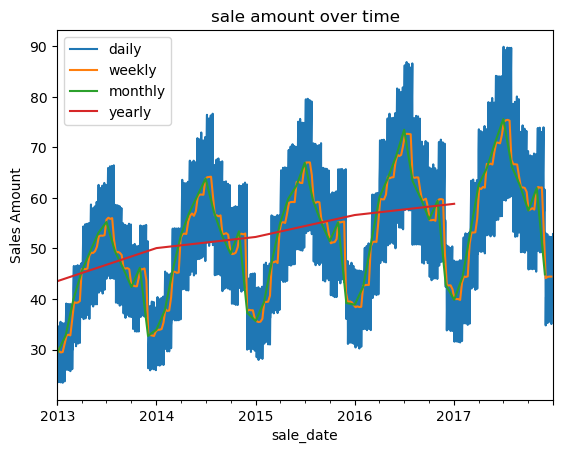

In [15]:
df['sale_amount'].resample('D').mean().plot(label='daily')
df['sale_amount'].resample('W').mean().plot(label='weekly')
df['sale_amount'].resample('M').mean().plot(label='monthly')
df['sale_amount'].resample('Y').mean().plot(label='yearly')


plt.title('sale amount over time')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [16]:
# split off 2017 as test
train = df.loc[:'2016']
test = df.loc['2017']

In [17]:
train.tail()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2016-12-31,4,26,300436344045,300436344045,Triaminic,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,463439,43,516 S Flores St,78204,San Antonio,TX,12,2016,Saturday,42.14
2016-12-31,9,11,657622604842,657622604842,Honest Tea,Honest Tea Peach White Tea,3.93,198669,68,735 SW Military Dr,78221,San Antonio,TX,12,2016,Saturday,267.24
2016-12-31,2,4,208528800007,208528800007,Boars Head,Boars Head Sliced White American Cheese - 120 Ct,3.14,58067,26,9255 FM 471 West,78251,San Antonio,TX,12,2016,Saturday,81.64
2016-12-31,1,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,695341,45,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,12,2016,Saturday,405.90
2016-12-31,7,23,70670009658,70670009658,Reese,Reese Mandarin Oranges Segments In Light Syrup,1.78,414137,20,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,2016,Saturday,35.60


In [18]:
test.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2017-01-01,6,14,41167300121,41167300121,Pamprin,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,247972,47,1015 S WW White Rd,78220,San Antonio,TX,1,2017,Sunday,354.38
2017-01-01,8,31,652790100226,652790100226,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,562044,62,15000 San Pedro Ave,78232,San Antonio,TX,1,2017,Sunday,261.02
2017-01-01,10,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,17896,25,8503 NW Military Hwy,78231,San Antonio,TX,1,2017,Sunday,21.00
2017-01-01,6,37,73575295003,73575295003,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,667952,19,1015 S WW White Rd,78220,San Antonio,TX,1,2017,Sunday,182.21
2017-01-01,7,49,62338879772,62338879772,Easy-off,Easy-off Oven Cleaner Lemon Scent,9.54,888898,18,12018 Perrin Beitel Rd,78217,San Antonio,TX,1,2017,Sunday,171.72


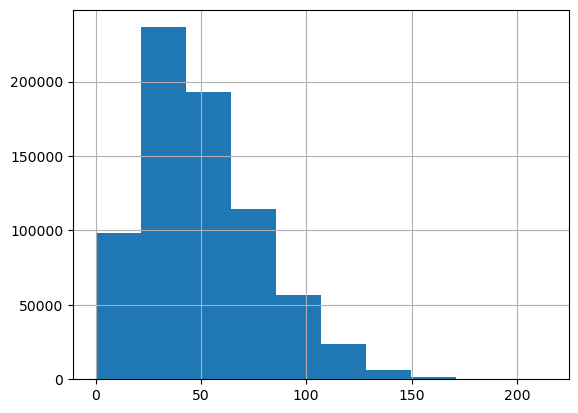

In [19]:
train.sale_amount.hist()
plt.show()

<Axes: >

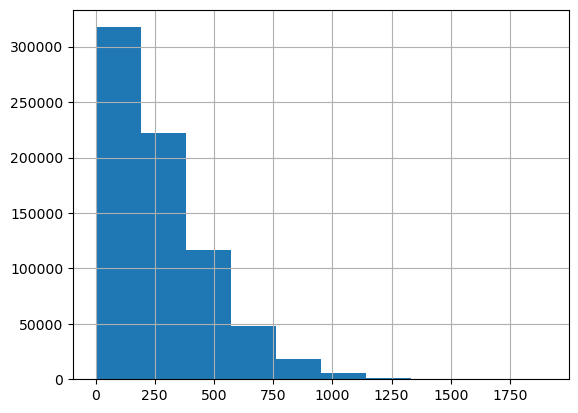

In [20]:
train.sales_total.hist()

## sales_total will be my target

In [21]:
# target will be sales_total
y = train.sales_total

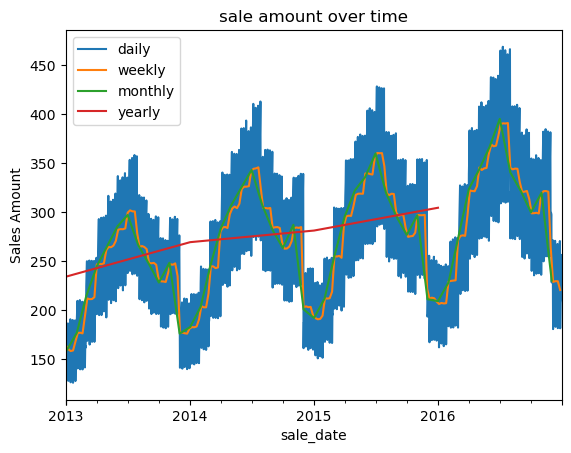

In [22]:
train['sales_total'].resample('D').mean().plot(label='daily')
train['sales_total'].resample('W').mean().plot(label='weekly')
train['sales_total'].resample('M').mean().plot(label='monthly')
train['sales_total'].resample('Y').mean().plot(label='yearly')


plt.title('sale amount over time')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

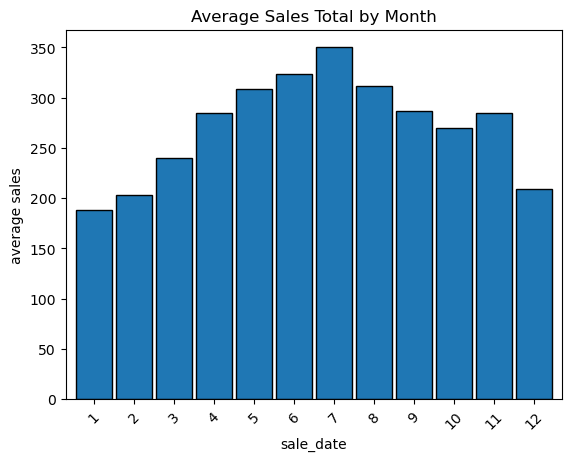

In [59]:
ax = y.groupby(y.index.month).mean().plot.bar(width=0.9, ec='black')
ax.set_title('Average Sales Total by Month')
plt.ylabel('average sales')
plt.xticks(rotation=45)
plt.show()

## Normal Distribution for total sales by month

## Appears that sales increase in Nov...Could this be because of 'black_friday'?

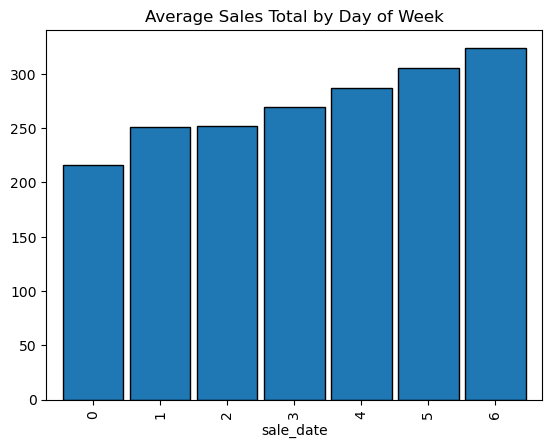

In [24]:
ax = y.groupby(
    y.index.day_of_week).mean().plot.bar(width=0.9, ec='black')

ax.set_title('Average Sales Total by Day of Week')
# ax.set(xlabels=y.index.day_name().unique().to_list())
plt.show()

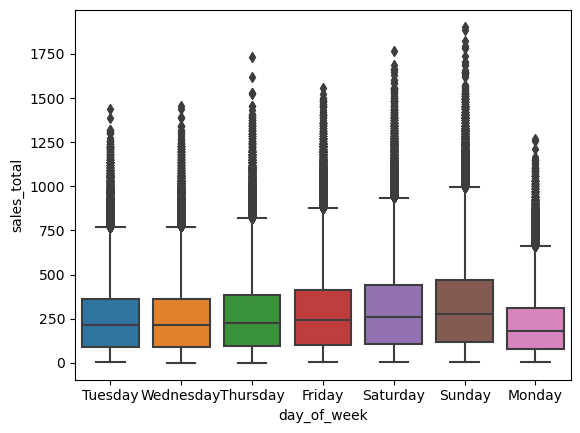

In [25]:
sns.boxplot(
    data=train,
x='day_of_week',
y='sales_total')
plt.show()

<Axes: xlabel='sale_date'>

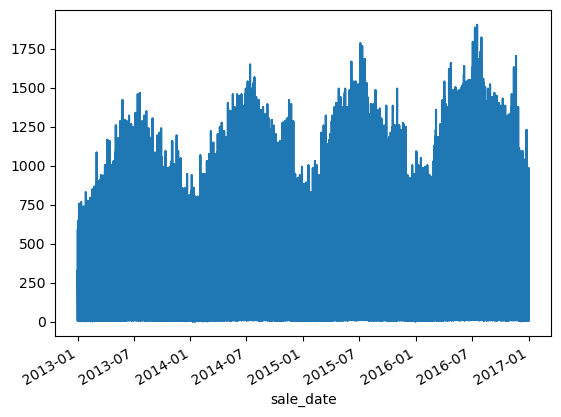

In [26]:
y.plot()

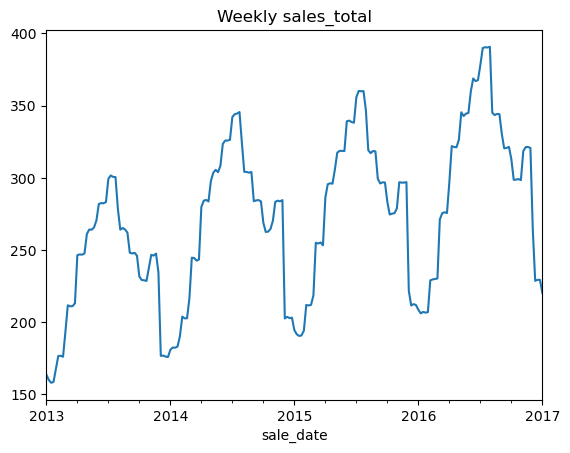

In [27]:
y.resample('1W').mean().plot(title='Weekly sales_total')
plt.show()

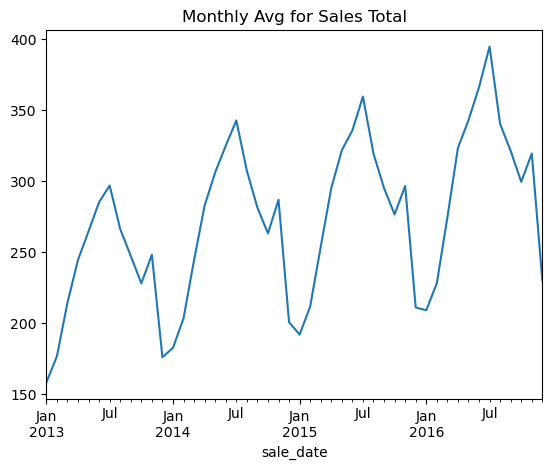

In [28]:
y.resample('1M').mean().plot(title='Monthly Avg for Sales Total')
plt.show()

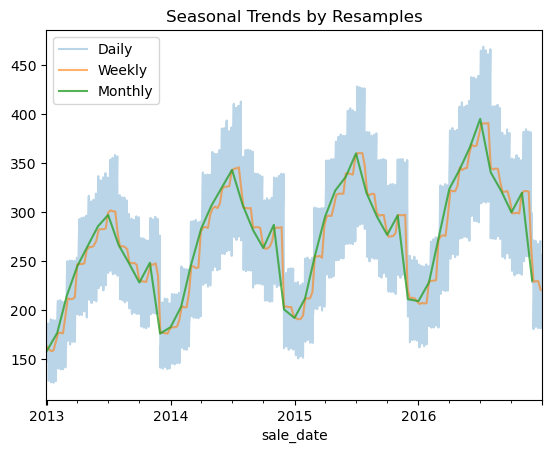

In [29]:
y.resample('1D').mean().plot(label='Daily', alpha=0.3)
y.resample('1W').mean().plot(label='Weekly', alpha=0.6)
y.resample('1M').mean().plot(label='Monthly', alpha=0.8)
# y.resample('1Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Seasonal Trends by Resamples')
plt.show()

## Lets see what it looks like with lag

In [30]:
pd.concat([y.resample('W').mean(),y.resample('W').mean().diff()], axis=1)

,sales_total,sales_total
sale_date,,
2013-01-06,163.589167,NaN
2013-01-13,159.981203,-3.607964
2013-01-20,157.946720,-2.034483
2013-01-27,158.545383,0.598663
2013-02-03,167.585014,9.039631
...,...,...
2016-12-04,263.768997,-56.861163
2016-12-11,228.559894,-35.209103
2016-12-18,229.298643,0.738749


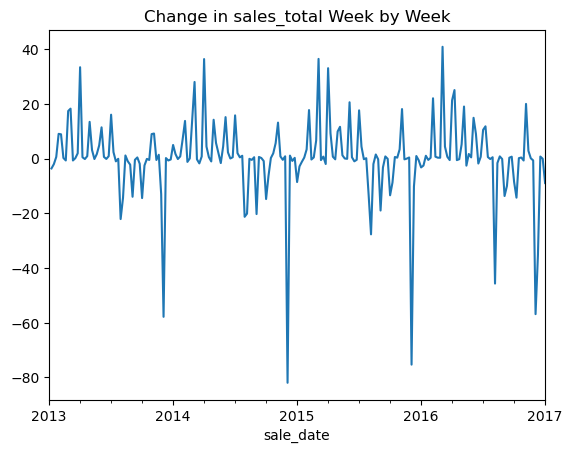

In [31]:
y.resample('W').mean().diff().plot()
plt.title('Change in sales_total Week by Week')
plt.show()

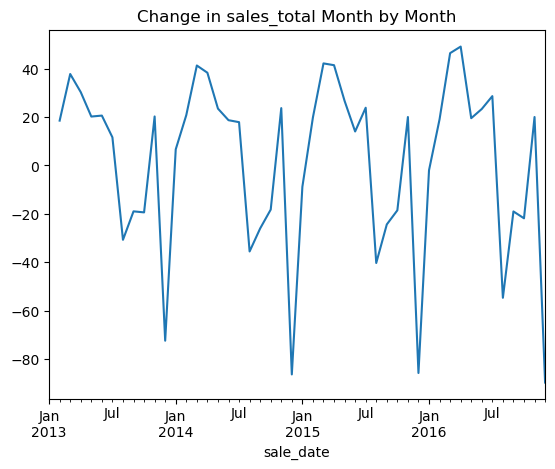

In [32]:
y.resample('M').mean().diff().plot()
plt.title('Change in sales_total Month by Month')
plt.show()

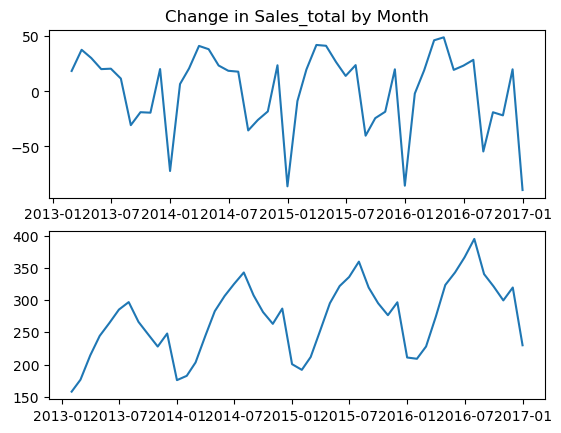

In [33]:
# lets compare the diff in months with the average month
# set up a subplots call:
fig, axs = plt.subplots(2,1)
axs[0].plot(y.resample('M').mean().diff())
axs[0].set_title('Change in Sales_total by Month')
axs[1].plot(y.resample('M').mean())
plt.show()

In [34]:
# pivoting out a two layer index:
# df.unstack()
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


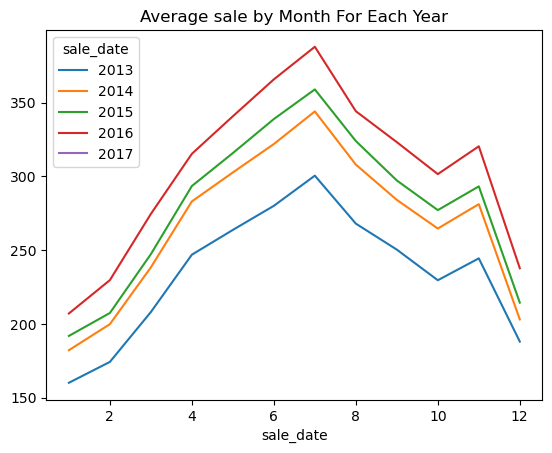

In [60]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('Average sale by Month For Each Year')
plt.show()

## Theres an increase every year, is this because of inflation?


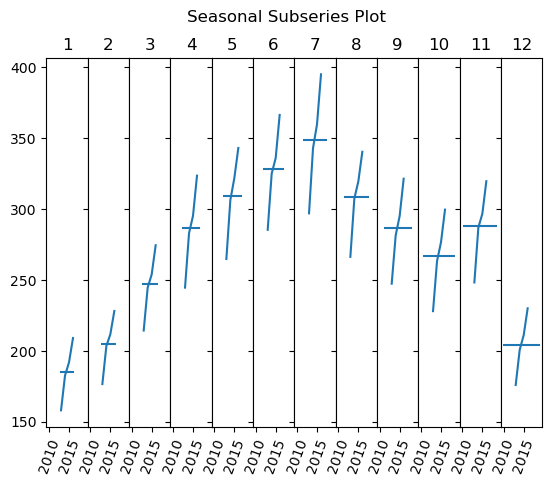

In [36]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


## We can see from this graph that the sales total has increased each month drastically

## How do the lag plots look?

Text(0.5, 1.0, 'Lag plot with lag=1')

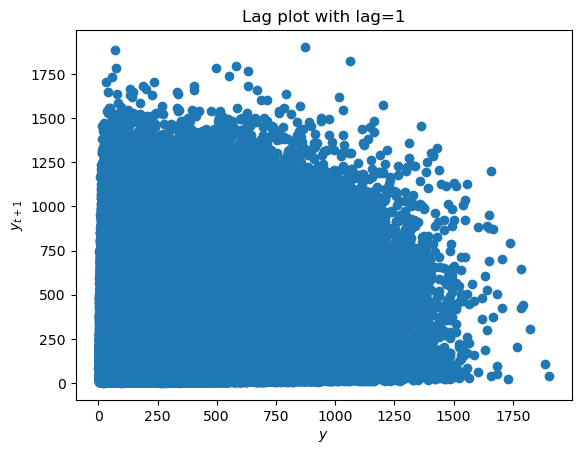

In [37]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

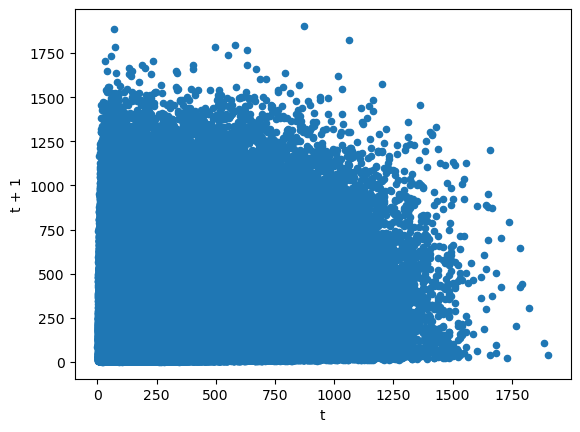

In [38]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [39]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day_of_week,sales_total,y(t + 1)
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2013,Tuesday,10.92,30.16
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,30.16,308.48
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,2013,Tuesday,308.48,197.55
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,197.55,25.16
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,25.16,162.98


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

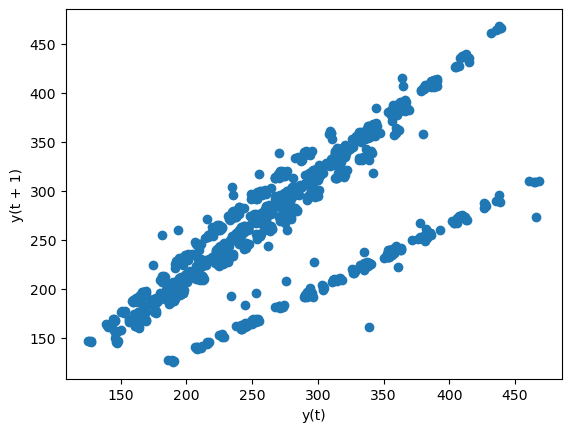

In [40]:
pd.plotting.lag_plot(train.sales_total.resample('D').mean())

<Axes: xlabel='y(t)', ylabel='y(t + 52)'>

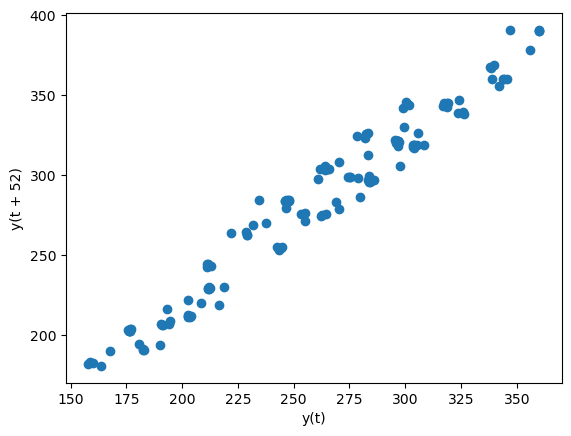

In [41]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), 52)

In [42]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day_of_week,sales_total,y(t + 1)
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2013,Tuesday,10.92,30.16
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,30.16,308.48
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,2013,Tuesday,308.48,197.55
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,197.55,25.16
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,2013,Tuesday,25.16,162.98


In [43]:
drop_cols = ['item_name', 'item_brand', 'store_address', 'store_city', 'store_state', 'day_of_week']

In [44]:
weekly = train.drop(columns=drop_cols).resample('W').mean()

In [45]:
weekly.head()

,store_id,item_id,item_price,sale_id,sale_amount,month,year,sales_total,y(t + 1)
sale_date,,,,,,,,,
2013-01-06,5.5,25.5,5.1604,455590.5,30.355667,1.000000,2013.0,163.589167,163.631807
2013-01-13,5.5,25.5,5.1604,455597.0,29.686286,1.000000,2013.0,159.981203,159.969254
2013-01-20,5.5,25.5,5.1604,455604.0,29.414286,1.000000,2013.0,157.946720,157.992051
2013-01-27,5.5,25.5,5.1604,455611.0,29.513714,1.000000,2013.0,158.545383,158.530029
2013-02-03,5.5,25.5,5.1604,455618.0,31.150571,1.428571,2013.0,167.585014,167.534037


In [46]:
weekly.loc[:,'next_week'] = weekly.sales_total.shift(-1).values

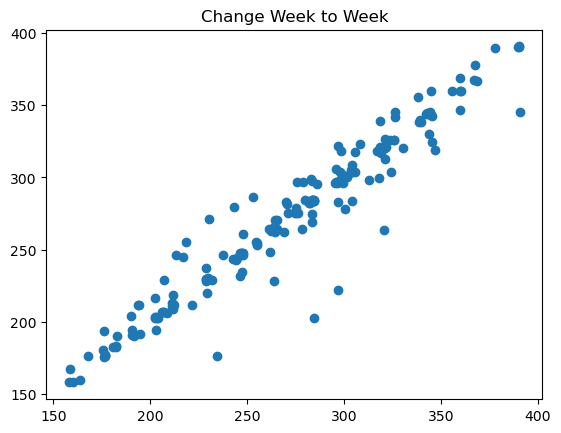

In [47]:
plt.scatter(weekly.sales_total, weekly.next_week)
plt.title('Change Week to Week')
plt.show()

## How is the autocorrelation?

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

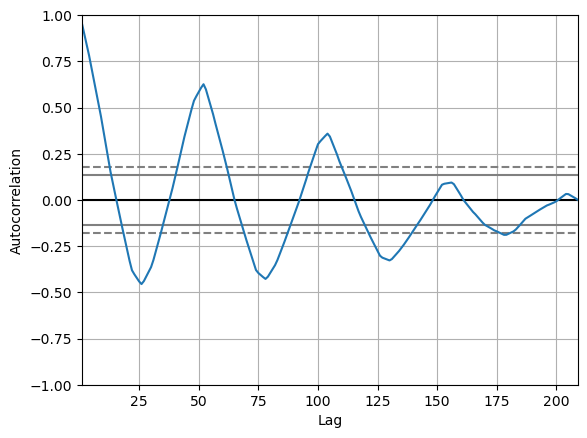

In [48]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

## Seasonal Decomposition

In [49]:
# use the weekly values to grab a new y for examination:
y = train.sales_total.resample('W').mean()

In [50]:
# lets use statsmodels time series to get a seasonal decomposition
result = sm.tsa.seasonal_decompose(y)

In [51]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
})

In [52]:
decomposition.head()

,y,trend,seasonal,residual
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


In [53]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()

In [54]:
decomposition.head()

,y,trend,seasonal,residual,trend_centered
sale_date,,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN,NaN


<Axes: xlabel='sale_date'>

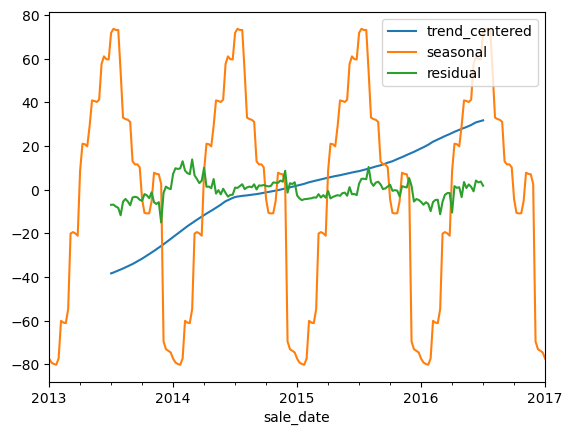

In [55]:
decomposition[['trend_centered', 'seasonal', 'residual']].plot()

## Upward trend of sales total over the years


# OPSD Power

In [56]:
power = a.grab_power_api_df('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv', 'opsd_germany_daily.csv')

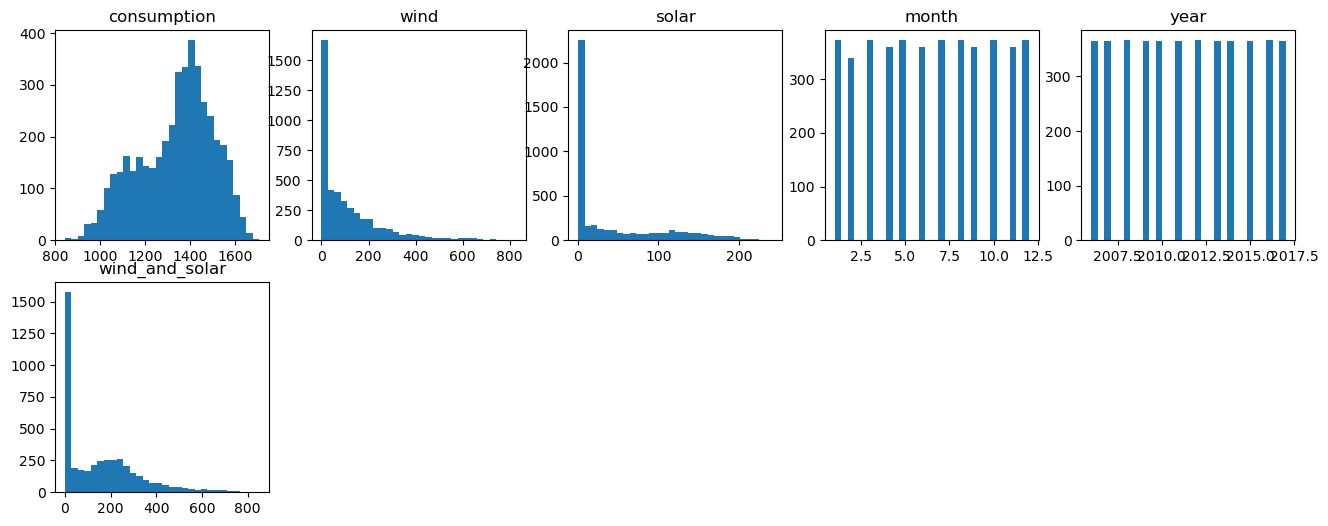

In [57]:
power = p.clean_germany_power(power)

## Target will be consumption